<center>
<h1> TP-Projet d'optimisation num√©rique </h1>
<h1> Algorithme du lagrangien augment√© </h1>
</center>

## Impl√©mentation

1. Impl√©menter l'algorithme du lagrangien augment√©, en utilisant les diff√©rentes m√©thodes
qui ont √©t√© vues en premi√®re partie pour la r√©solution de la suite de probl√®mes sans
contraintes (fichier `src/lagrangien_augmente.jl`). La sp√©cification est donn√©e dans le fichier.
2. V√©rifier que les tests ci-dessous passent.
 

In [1]:
include("../src/lagrangien_augmente.jl")
include("../test/tester_lagrangien_augmente.jl")

#
afficher = true # si true, alors affiche les r√©sultats des algorithmes

#
tester_lagrangien_augmente(lagrangien_augmente, afficher);

Affichage des r√©sultats des algorithmes : true

-------------------------------------------------------------------------
R√©sultats de : LA et newton appliqu√© √† f1:
  * x0       = [0, 1, 1]
  * x_sol    = [0.5000042424566808, 1.2499978787716595, 0.5000042424566811]
  * f(x_sol) = 3
  * nb_iters = 7
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
R√©sultats de : LA et newton appliqu√© √† f1:
  * x0       = [0.5, 1.25, 1.0]
  * x_sol    = [0.5000042424566808, 1.2499978787716595, 0.5000042424566811]
  * f(x_sol) = 0.75
  * nb_iters = 7
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
R√©sultats de : LA et newton appliqu√© √† f2:
  * x0       = [1, 0]
  * x_sol    = [0.9072338859288741, 0.8227553207255176]
  * f(x_sol) = 100
  * nb_iters = 5
  * flag     = 0
  * solution = [0.9072339605110892, 0.82275545631455]
----------------------------

## Interpr√©tation

 1. Commenter les r√©sultats obtenus, en √©tudiant notamment les valeurs en sortie de $\lambda_k$ et $\mu_k$.
 2. √âtudier l'influence du param√®tre $\tau$ dans la performance de l'algorithme. Pour cela Vous r√©aliserez des tests num√©riques.

## R√©ponses

**Question 1**

**Analyse des r√©sultats:**

TODO

**Influence des param√®tres $\lambda_k$ et $\mu_k$**

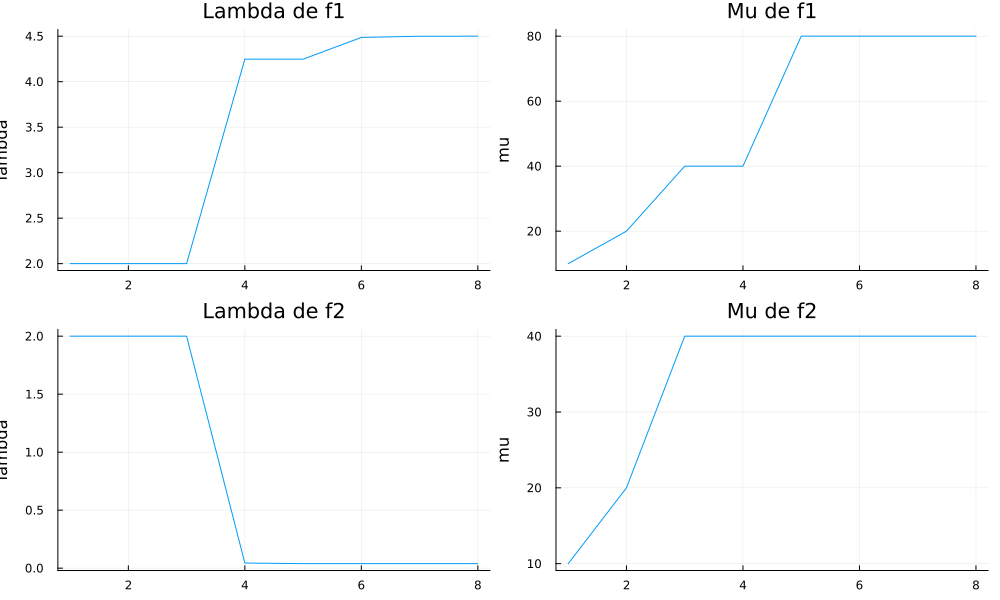

In [14]:
include("../src/regions_de_confiance.jl")
include("../src/newton.jl")         # votre algorithme de Newton
include("../src/lagrangien_augmente.jl")
include("../test/fonctions_de_tests.jl")
using Plots

_,_,_,_,u_f2,lambda_f2 = lagrangien_augmente(fct2, grad_fct2, hess_fct2, contrainte2, grad_contrainte2, hess_contrainte2, x04)

# ùúÜùëò
courbe_lambda_f2 = plot(lambda_f2, xlabel = "", ylabel = "lambda", title = "Lambda de f2", legend = false)

# ùúáùëò
courbe_mu_f2 = plot(u_f2, xlabel = "", ylabel = "mu", title = "Mu de f2", legend = false)

_,_,_,_,u_f1,lambda_f1 = lagrangien_augmente(fct1, grad_fct1, hess_fct1, contrainte1, grad_contrainte1, hess_contrainte1, x01, algo_noc="newton", tol_abs = 1e-4)

# ùúÜùëò
courbe_lambda_f1 = plot(lambda_f1, xlabel = "", ylabel = "lambda", title = "Lambda de f1", legend = false)

# ùúáùëò
courbe_mu_f1 = plot(u_f1, xlabel = "", ylabel = "mu", title = "Mu de f1", legend = false)

plot(courbe_lambda_f1, courbe_mu_f1, courbe_lambda_f2, courbe_mu_f2, layout=(2,2), size = (1000, 600))

**Comparaison.** TODO

**Question 2**

TODO

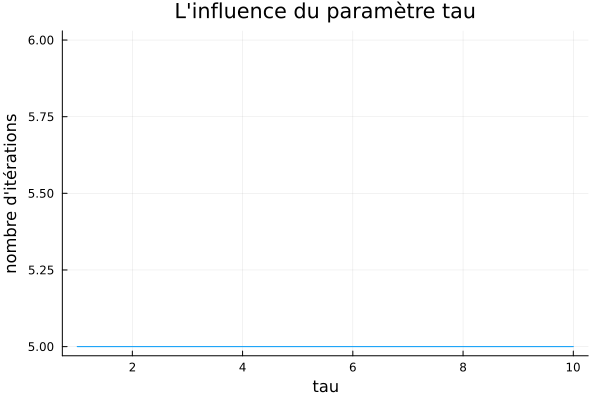

In [23]:
include("../src/regions_de_confiance.jl")
include("../src/newton.jl")         # votre algorithme de Newton
include("../src/lagrangien_augmente.jl")
include("../test/fonctions_de_tests.jl")
using Plots

nb_test = 100

tau_values = range(1,10,length=nb_test)
nb_iters = zeros(nb_test)
for i in 1:nb_test
    _,_,_,nb_iters[i],_,_ = lagrangien_augmente(fct1, grad_fct1, hess_fct1, contrainte1, grad_contrainte1, hess_contrainte1, x01, algo_noc="newton", tol_abs = 1e-2)
end
plot(tau_values, nb_iters, xlabel = "tau", ylabel = "nombre d'it√©rations", title = "L'influence du param√®tre tau", legend = false)